In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline

In [2]:
test_data = pd.read_csv('data-sets/test.csv')
train_data = pd.read_csv('data-sets/train.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
####################
# Data Information
####################
# PassengerId: Identification of passenger for accuracy check on Kaggle
# Survived: If the individual survivied (1) or died (0)
# Pclass: The ticket class: 1: 1st class, 2: 2nd class, 3: 3rd class
# Name: The name of the individual: String #### Not sure if there is meaningful data here?
# Sex: male vs female: *** This Data should be encoded as Male(1) and Female(0)
# SibSp: Number of Siblings & Spouses aboard
# Parch: Number of Parents & Children aboard
# Ticket: Ticket Number: *** Not sure of the meaningfulness behind the data?
# Fare: Cost of the passenger
# Cabin: Cabin Number: *** Not sure if this is meaningful? Notable amount of Null values
# Embarked: Location of Embarkation *** This Data should be Encoded as C(0), Q(1), S(2)

####################
# Classification Problem: Determine if the passenger will Survive (1) or Die (0)
####################

##### Notes to check the data #######
# Did the wealthy survive? Middle Class?
# Did Younger individuals survive? Lower class children vs upper class adults?
# Did location matter? Did certain Embarked areas correlate to wealthier individuals?
# Were Females more likely to survive?  
# Larger vs Smaller Families? 
# Siblings vs Parch vs total family size
#####################################

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
cm = sns.light_palette("purple", as_cmap=True)
corr = train_data.corr()
corr.style.set_caption('Colormaps, with a caption.').background_gradient(cmap=cm)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.661022,0.157112
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.263276,0.104057
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.102485,-0.022239
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.318528,0.066654
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.332186,0.038322
Fare,-0.661022,-0.263276,0.102485,0.318528,0.332186,1.000000,-0.197567
Embarked,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.197567,1.000000


In [7]:
# Average Survival Rate of 38%
# Age, Cabin, and Embarked Contain Null Values

##77% of Train Data contains NULL values for Cabin (687) ##
##78% of Test Data contains NULL values for Cabin (327) ##
#####Decided to Drop Cabin Column due to significant amount of null data

train_ids = train_data['PassengerId'] #Place IDs used for grading in their own DF
test_ids = test_data['PassengerId'] # Same with Test Data for uniformity 

train_data = train_data.drop(columns=['PassengerId','Cabin'])
test_data = test_data.drop(columns=['PassengerId','Cabin'])

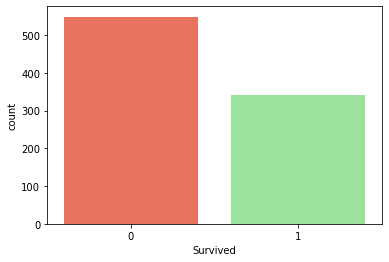

In [8]:
sns.countplot(train_data['Survived'],palette=["tomato", "lightgreen"])

In [9]:
## Use the Label Encoder to Set Sex to a Binary Value
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data.Sex) #Male as 1, Female as 0
test_data['Sex'] = le.transform(test_data.Sex)       #Male as 1, Female as 0

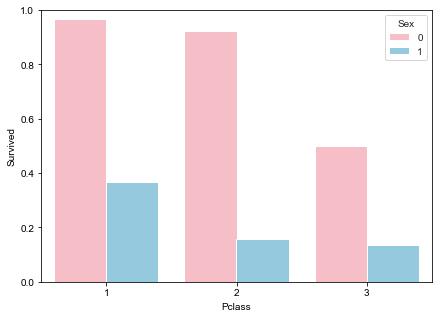

In [10]:
#### Notes the correlation between gender in each class, and their survival rate
plt.figure(figsize=(7,5))
plt.ylim(0.0, 1.0)
plt.xlim(1, 3)
sns.set_style("whitegrid")
group = sns.barplot(x=train_data.Pclass, y=train_data.Survived, hue=train_data.Sex, palette=["lightpink","skyblue",], ci=None)
## Females are much more likely to survive, even at a higher rate at lower classes than men from higher classes

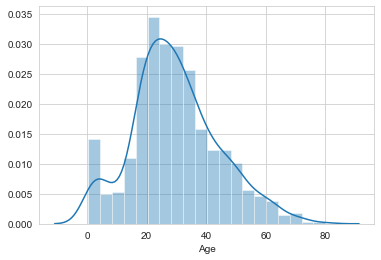

In [11]:
sns.distplot(train_data['Age'])
##Follows a normal distribution with a notable bump for very young children

In [12]:
##19% of Train Data contains NULL values for Age (177) ##
##20% of Test Data contains NULL values for Age (86) ##
#####Decided to replace Null Values with the average passanger age
##Should also try median to see if that improves the accuracy?

train_data.Age = train_data.Age.fillna(train_data.Age.mean())
test_data.Age = test_data.Age.fillna(test_data.Age.mean())

In [13]:
### Name and Ticket data
# Due to unknown way to work with the Ticket values as they are seemingly ungrouped and no notable naming convention, 
#     they are dropped
# The only notable value from the Name would be the title (Mr, Mrs, Miss) but this is primarily 
#    inferred from gender, age, and Parch, so it is dropped as well
train_data = train_data.drop(columns=['Name', 'Ticket'])
test_data = test_data.drop(columns=['Name', 'Ticket'])

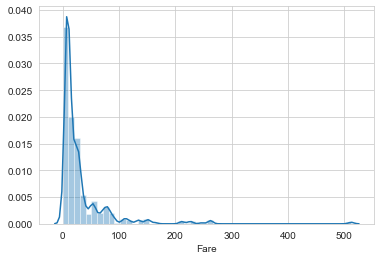

In [14]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.median())
sns.distplot(train_data['Fare'])
# Filled Fare with the median for any null values due it not being normally distributed
# Fare is not evenly distributed so normalization should be done

In [15]:
train_data['Fare'] = np.log(train_data.Fare+1)
test_data['Fare'] = np.log(test_data.Fare+1)

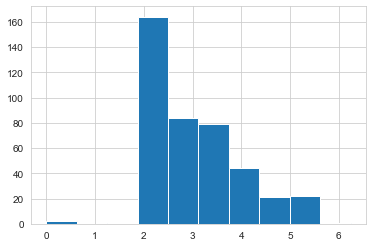

In [16]:
test_data['Fare'].hist()

In [17]:
##Embarked should be transformed into an integer value for easier comparison

train_data['Embarked'] = le.fit_transform(train_data.Embarked.astype(str))
test_data['Embarked'] = le.transform(test_data.Embarked.astype(str))

#0.2% of Train Data contains NULL values for Embarked (2) ##
#####Decided to replace Null Embarked with the mode of Embarked
train_data.Embarked = train_data.Embarked.fillna(train_data.Embarked.mode())

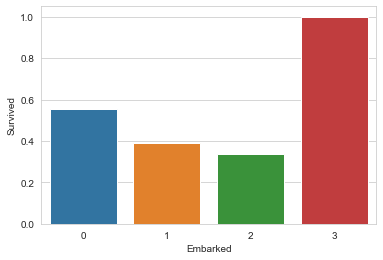

In [18]:
sns.barplot(x=train_data.Embarked, y=train_data.Survived, ci=None)

In [19]:
##Copied all Survived 
df_survived = train_data.Survived
train_data = train_data.drop(columns=['Survived'])
df_survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
X_train = train_data
X_test = test_data

y_train = df_survived
y_train.shape

(891,)

<B>Model Building</B>

In [21]:
sc = StandardScaler()
X_train_scaled = X_train
X_train_scaled[['Age','SibSp','Parch','Fare']]= sc.fit_transform(X_train_scaled[['Age','SibSp','Parch','Fare']])
X_test_scaled = X_test.copy()
X_test_scaled[['Age','SibSp','Parch','Fare']]= sc.fit_transform(X_test_scaled[['Age','SibSp','Parch','Fare']])

In [22]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.74444444 0.85393258 0.71910112 0.80898876 0.86516854 0.80898876
 0.83146067 0.78651685 0.82022472 0.79775281]
0.8036579275905119


In [23]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.81111111 0.85393258 0.7752809  0.87640449 0.82022472 0.79775281
 0.82022472 0.78651685 0.84269663 0.84269663]
0.8226841448189763


In [24]:
##################### Training and Predictions ###############
##############################################################

In [25]:
X_train = sc.fit_transform(X_train)
test_transformed = sc.transform(test_data)

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
test_knn_pred = knn.predict(X_test_scaled)

In [53]:
data = []
knn_pred_df = pd.DataFrame(data, columns=[])
knn_pred_df['PassengerId'] = test_ids;
knn_pred_df['Survived'] = test_knn_pred

In [80]:
knn_pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
#knn_pred_df.to_csv('knn_prediction.csv', index=False)
## KNN Model that produces results of about ~70.5% Accuracy

In [71]:
svc.fit(X_train_scaled, y_train)
test_svc_pred = svc.predict(X_test_scaled)

In [72]:
svc_pred_df = pd.DataFrame(data, columns=[])
svc_pred_df['PassengerId'] = test_ids;
svc_pred_df['Survived'] = test_svc_pred
#test_svc_pred

In [73]:
#svc_pred_df.to_csv('svc_prediction.csv', index=False)
## SVC Model that produces results of about ~78.2% Accuracy